In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers
from tensorflow.keras.models import Sequential

In [15]:
model = models.Sequential()
model.add(Conv2D(32,(3,3), activation= 'relu', input_shape=(150,150,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)       

In [16]:
train_datagen=ImageDataGenerator(rescale=1./255,
                  rotation_range=40,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator=train_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/train',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary',
                                 color_mode='grayscale')

val_generator=test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary',
                                 color_mode='grayscale')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
checkpoint = ModelCheckpoint('modelo_perros_gatos.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True)

early = EarlyStopping(monitor='val_accuracy', patience=20, verbose=0)

In [19]:
model.compile(optimizer='adam', metrics='accuracy',
             loss='binary_crossentropy',)

In [20]:
hist = model.fit(train_generator, steps_per_epoch = 2000//32,
                epochs = 100,
                validation_data = val_generator,
                validation_steps = 1000//32,
                callbacks = [checkpoint, early])

Epoch 1/100


2022-10-18 02:51:38.613947: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


62/62 [==============================] - 27s 315ms/step - loss: 0.6948 - accuracy: 0.5005 - val_loss: 0.6927 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to modelo_perros_gatos.hdf5
Epoch 2/100
62/62 [==============================] - 14s 222ms/step - loss: 0.6921 - accuracy: 0.5137 - val_loss: 0.6777 - val_accuracy: 0.5958

Epoch 00002: val_accuracy improved from 0.50000 to 0.59577, saving model to modelo_perros_gatos.hdf5
Epoch 3/100
62/62 [==============================] - 13s 206ms/step - loss: 0.6890 - accuracy: 0.5361 - val_loss: 0.6863 - val_accuracy: 0.6149

Epoch 00003: val_accuracy improved from 0.59577 to 0.61492, saving model to modelo_perros_gatos.hdf5
Epoch 4/100
62/62 [==============================] - 13s 218ms/step - loss: 0.6772 - accuracy: 0.5788 - val_loss: 0.6494 - val_accuracy: 0.6401

Epoch 00004: val_accuracy improved from 0.61492 to 0.64012, saving model to modelo_perros_gatos.hdf5
Epoch 5/100
62/62 [============

<function matplotlib.pyplot.show(close=None, block=None)>

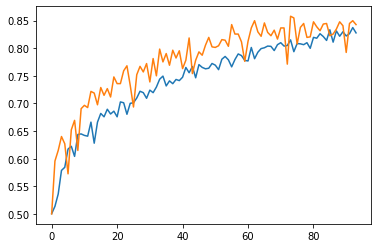

In [24]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.show

In [25]:
test_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/test',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary',color_mode='grayscale')

Found 1000 images belonging to 2 classes.


In [26]:
model.evaluate(test_generator)

32/32 [==============================] - 6s 174ms/step - loss: 0.3534 - accuracy: 0.8360


[0.35342109203338623, 0.8360000252723694]

In [28]:
preds = model.predict(test_generator)